In [29]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [30]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [31]:
df.shape

(10754, 22)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [32]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [34]:
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [35]:
#Display number missing values per column
df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [36]:
# check columns types 
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [37]:
# Check outliers.


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Dealing with outliers:

In [38]:
categorical_features = ['team', 'position']

numeric_features = ['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']

In [39]:
for i in categorical_features:
    print(df[i].value_counts())


team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


In [40]:
for i in numeric_features:
    print(df[i].value_counts())


height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

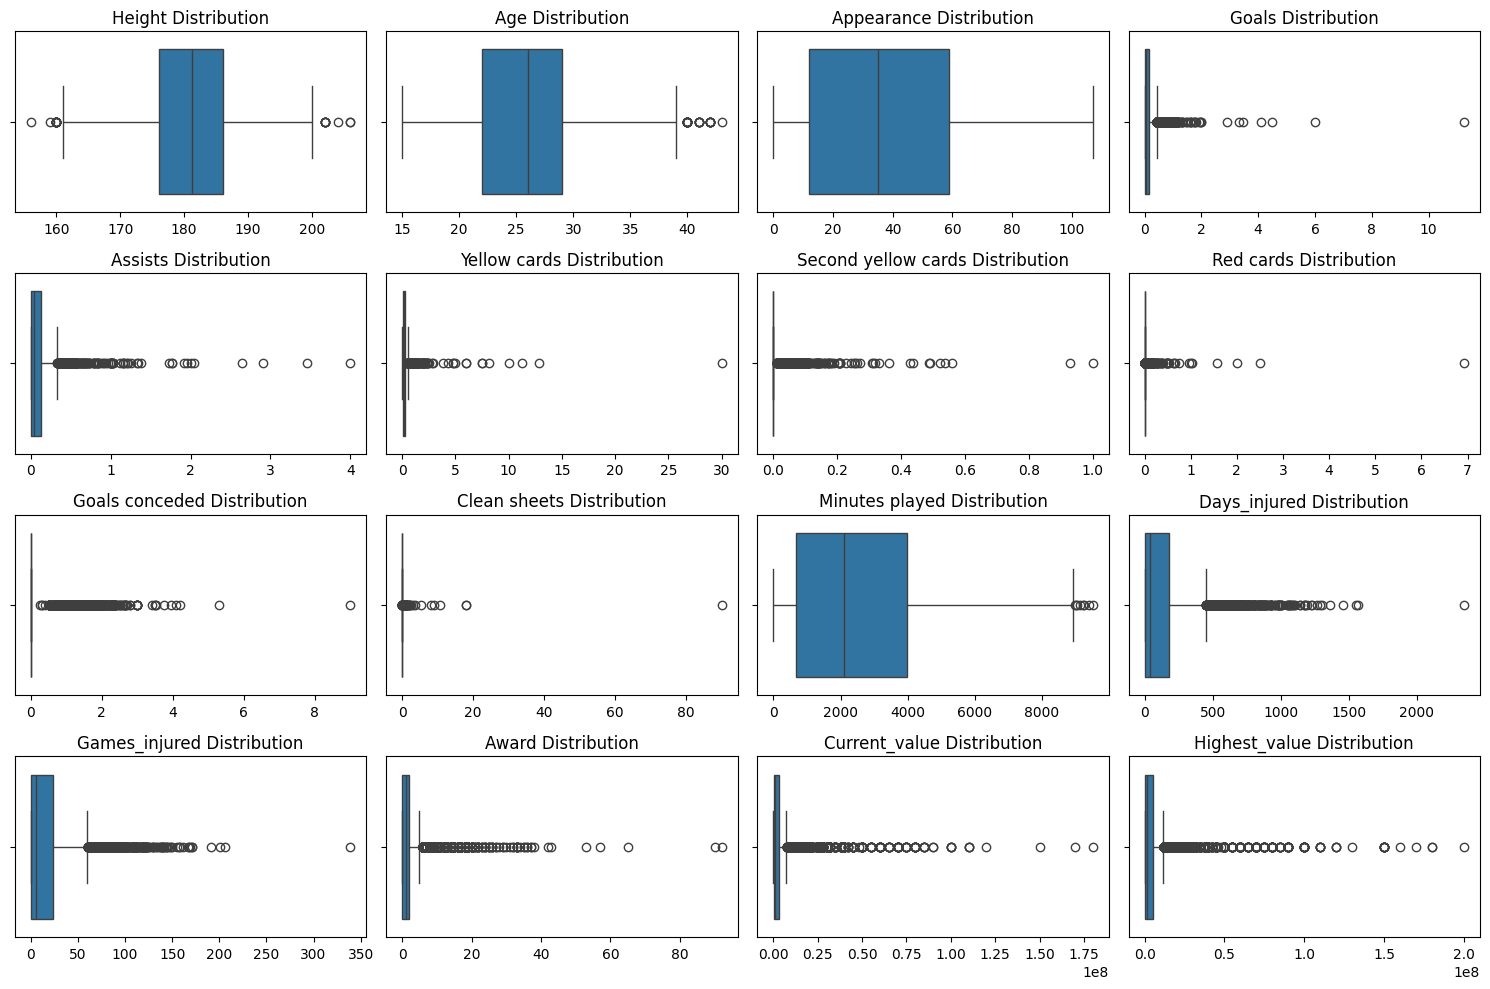

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to analyze
columns_to_analyze = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

# Plotting box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [42]:
# List of columns to analyze for outliers
columns_to_analyze = [
    'height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
    'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
    'minutes played', 'days_injured', 'games_injured', 'award', 
    'current_value', 'highest_value'
]

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 7.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from the specified columns
df_cleaned = remove_outliers(df, columns_to_analyze)

# Display the shape of the original and cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (10754, 22)
Cleaned DataFrame shape: (7057, 22)


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [43]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

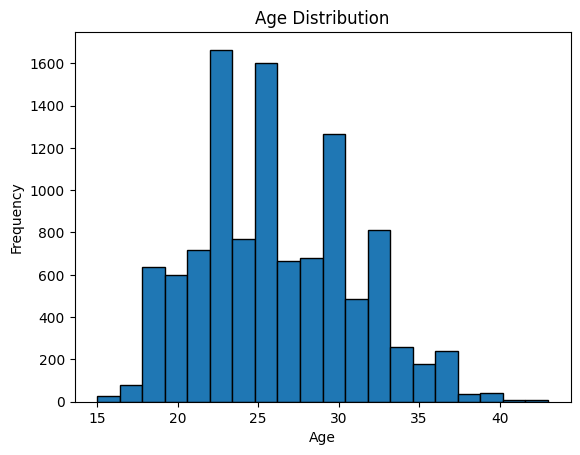

In [44]:
import matplotlib.pyplot as plt

# Univariate Analysis
df['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


**Categorical & Categorical --> (Stacked Column Chart)**

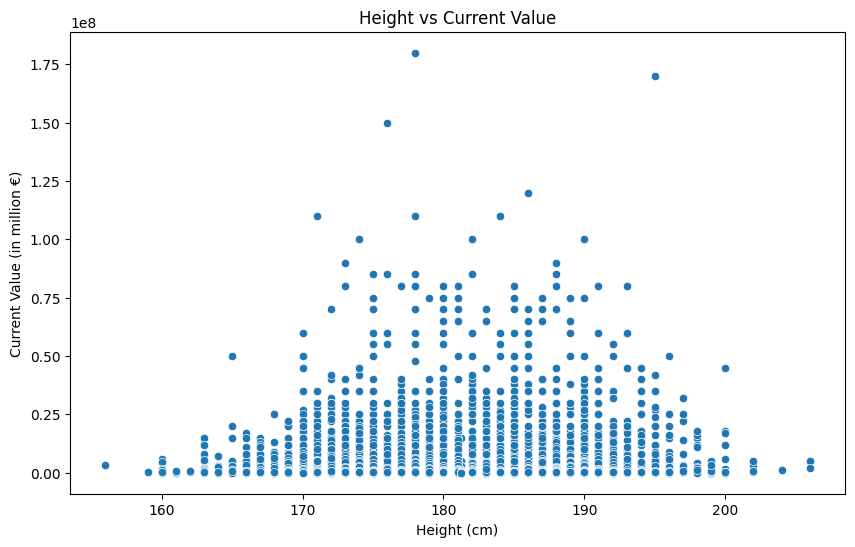

In [45]:
import seaborn as sns

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='height', y='current_value')
plt.title('Height vs Current Value')
plt.xlabel('Height (cm)')
plt.ylabel('Current Value (in million €)')
plt.show()


We could also use a correlation matrix to get more specific information about the relationship between these two variables.

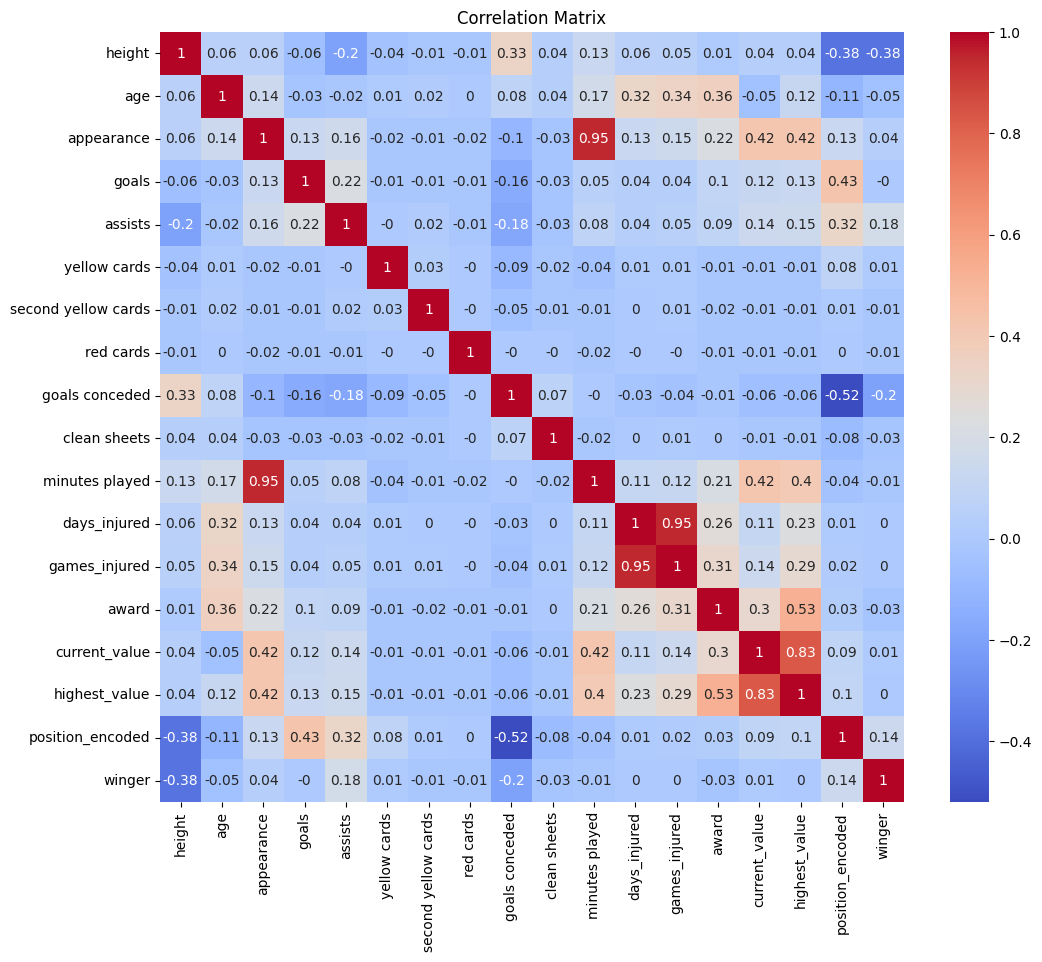

In [46]:
# Selecting relevant numerical columns for correlation analysis
numerical_columns = ['age', 'height', 'appearance', 'goals', 'assists', 'yellow cards', 
                     'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
                     'minutes played', 'days_injured', 'games_injured', 'current_value', 'highest_value']

plt.figure(figsize=(12, 10))
sns.heatmap(round(df[numeric_features].corr(),2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Building the model :

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [48]:
df['goals'].min()

0.0

In [49]:
df['goals'].max()

11.25

In [50]:
df['goals'].mean()

0.12555431571759346

In [51]:
df[df['goals'] > 0.5]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
23,/marcus-rashford/profil/spieler/258923,Manchester United,Marcus Rashford,Attack-LeftWinger,185.0,25.0,88,0.528790,0.196408,0.075541,...,0.0,0.0,5957,319,35,9,80000000,85000000,4,1
26,/alejandro-garnacho/profil/spieler/811779,Manchester United,Alejandro Garnacho,Attack-LeftWinger,180.0,18.0,72,0.525730,0.300417,0.225313,...,0.0,0.0,3595,50,11,2,25000000,25000000,4,1
51,/gianluca-scamacca/profil/spieler/315867,West Ham United,Gianluca Scamacca,Attack Centre-Forward,195.0,24.0,65,0.591619,0.024651,0.271159,...,0.0,0.0,3651,217,38,5,27000000,30000000,4,0
159,/paul-onuachu/profil/spieler/272855,Southampton FC,Paul Onuachu,Attack Centre-Forward,200.0,29.0,76,0.710900,0.053318,0.142180,...,0.0,0.0,5064,125,19,6,17000000,22000000,4,0
161,/sekou-mara/profil/spieler/557612,Southampton FC,Sékou Mara,Attack Centre-Forward,183.0,20.0,58,0.542714,0.226131,0.180905,...,0.0,0.0,1990,0,0,0,12000000,12000000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,/jamie-maclaren/profil/spieler/173591,Melbourne City FC,Jamie Maclaren,Attack Centre-Forward,179.0,29.0,64,0.674879,0.096411,0.080343,...,0.0,0.0,5601,0,0,6,2000000,2000000,4,0
10694,/adam-le-fondre/profil/spieler/46106,Sydney FC,Adam Le Fondre,Attack Centre-Forward,180.0,36.0,51,0.574362,0.099889,0.049945,...,0.0,0.0,3604,61,9,5,400000,4000000,4,0
10720,/nestory-irankunda/profil/spieler/956920,Adelaide United,Nestory Irankunda,Attack-RightWinger,175.0,17.0,35,0.924262,0.231065,1.039795,...,0.0,0.0,779,0,0,0,350000,350000,4,1
10725,/luka-jovanovic/profil/spieler/1038441,Adelaide United,Luka Jovanovic,Attack Centre-Forward,179.0,18.0,9,0.862620,0.000000,0.000000,...,0.0,0.0,313,0,0,0,75000,75000,4,0


In [52]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [53]:
df = df[df['highest_value'] < 100000000]

In [54]:
df = df[df['appearance'] < 90]

In [55]:
df = df[df['goals'] < 0.5]

In [57]:
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.000000,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [58]:
df_treated = df.drop(["player","name","team","position"], axis=1)


In [59]:
dummied = pd.get_dummies(df['team'])


In [60]:
df_treated = pd.concat([df_treated, dummied], axis=1)


In [61]:
dummied = pd.get_dummies(df['position'])


In [62]:
df_treated = pd.concat([df_treated, dummied], axis=1)


In [63]:
df_treated


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,Defender Centre-Back,Defender Left-Back,Defender Right-Back,Goalkeeper,midfield,midfield-AttackingMidfield,midfield-CentralMidfield,midfield-DefensiveMidfield,midfield-LeftMidfield,midfield-RightMidfield
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0000,0.000000,1.242331,0.207055,...,False,False,False,True,False,False,False,False,False,False
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0000,0.000000,0.616438,0.924658,...,False,False,False,True,False,False,False,False,False,False
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0000,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0000,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
5,194.000000,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0000,0.104046,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df_treated.columns


Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       ...
       'Defender Centre-Back', 'Defender Left-Back', 'Defender Right-Back',
       'Goalkeeper', 'midfield', 'midfield-AttackingMidfield',
       'midfield-CentralMidfield', 'midfield-DefensiveMidfield',
       'midfield-LeftMidfield', 'midfield-RightMidfield'],
      dtype='object', length=408)

In [65]:
df_treated.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10034 entries, 1 to 10753
Columns: 408 entries, height to midfield-RightMidfield
dtypes: bool(390), float64(9), int64(9)
memory usage: 5.2 MB


In [66]:
correlation = df_treated.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value     1.000000
highest_value     0.815317
appearance        0.399519
minutes played    0.398219
award             0.232141
                    ...   
Attack           -0.029574
midfield         -0.036855
age              -0.061711
goals conceded   -0.066427
Goalkeeper       -0.084084
Name: current_value, Length: 408, dtype: float64


In [67]:
# Set the correlation threshold
threshold = 0.05  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'goals conceded',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_encoded', 'AC Milan',
       'Arsenal FC', 'Aston Villa', 'Atalanta BC', 'Atlético de Madrid',
       'Bayer 04 Leverkusen', 'Bayern Munich', 'Borussia Dortmund',
       'Brentford FC', 'Brighton &amp; Hove Albion', 'Chelsea FC',
       'Crystal Palace', 'Everton FC', 'FC Barcelona', 'Juventus FC',
       'Leeds United', 'Leicester City', 'Liverpool FC', 'Manchester City',
       'Manchester United', 'Newcastle United', 'Paris Saint-Germain',
       'RB Leipzig', 'Real Sociedad', 'SSC Napoli', 'Southampton FC',
       'Tottenham Hotspur', 'Villarreal CF', 'West Ham United',
       'Wolverhampton Wanderers', 'Goalkeeper'],
      dtype='object')

In [68]:
df_treated_selected = df_treated[selected_features]


In [69]:
X = df_treated_selected.drop("current_value", axis=1)
y = df_treated_selected["current_value"]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
LR_model = LinearRegression()

LR_model.fit(X_train_scaled, y_train)


LinearRegression()

In [72]:
LR_model.score(X_train_scaled, y_train)

0.7666720134304275

In [73]:
coeff_df = pd.DataFrame(LR_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-7.991445e+05
appearance,-1.456120e+06
goals,1.558721e+05
assists,1.149695e+05
goals conceded,-1.801378e+05
minutes played,2.223673e+06
days_injured,7.089229e+05
games_injured,-1.102954e+06
award,-8.142899e+05
highest_value,5.398351e+06


## Evaluating the Model 

1. R Square
2. Root Mean Absolute Error

In [74]:
y_pred = LR_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score:", r2)
print("RMSE:", rmse)

R2 score: 0.7118136020351961
RMSE: 3308690.6683646184


3. Mean Square Error

In [75]:
mse_train = mean_squared_error(y_train, LR_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 11344637723708.98
Mean Squared Error for testing: 10947433938923.105


4. Mean Absolute Error

In [76]:
mae_train = mean_absolute_error(y_train, LR_model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1793211.7430842803
Mean Absolute Error for testing: 1818559.2289485505


# Anther model with less number of features :

In [77]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'Arsenal FC', 'Chelsea FC'],
      dtype='object')

In [78]:
df_treated_selected = df_treated[selected_features]


In [79]:
X = df_treated_selected.drop("current_value", axis=1)
y = df_treated_selected["current_value"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
LR_model = LinearRegression()

LR_model.fit(X_train_scaled, y_train)


LinearRegression()

In [82]:
LR_model.score(X_train_scaled, y_train)

0.7262595629265404

In [83]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [84]:
# Initialize the Lasso model
lasso = Lasso(alpha=500000)

# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=500000)

In [85]:
# Get the coefficients
lasso_coefficients = lasso.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

# Display non-zero coefficients
selected_features = feature_importance[feature_importance['Coefficient'] != 0]
print(selected_features)


          Feature   Coefficient
1  minutes played  3.920782e+05
2           award -3.299435e+05
3   highest_value  5.197069e+06
4      Arsenal FC  2.502646e+05


In [86]:
coeff_df = pd.DataFrame(LR_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-1.023185e+06
minutes played,1.726447e+06
award,-1.228117e+06
highest_value,5.882176e+06
Arsenal FC,6.524018e+05
Chelsea FC,3.605191e+05


1. R Square
2. Root Mean Absolute Error

In [87]:
y_pred = LR_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R2 score:", r2)
print("RMSE:", rmse)

R2 score: 0.6606389084745794
RMSE: 3590462.963254282


3. Mean Square Error

In [88]:
mse_train = mean_squared_error(y_train, LR_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 13309531079342.582
Mean Squared Error for testing: 12891424290500.717


4. Mean Absolute Error

In [89]:
mae_train = mean_absolute_error(y_train, LR_model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1739060.1696825498
Mean Absolute Error for testing: 1786497.3944273416


The first model, with an R2 score of 0.7691 and an RMSE of 4,649,973.54, provides a comprehensive analysis by incorporating a wide range of features including player statistics, team, and position information. Key coefficients include age (-856,850.8), appearance (-1,712,675), goals (141,764.3), assists (163,510.9), goals conceded (-236,561), minutes played (2,752,375), days injured (665,057.5), games injured (-1,119,712), award (-1,396,247), and highest value (7,180,668). Various teams and positions also have specific coefficients.

R2 Score: 0.7691
RMSE: 4,649,973.54
Comprehensive set of features, including player statistics, team, and position information
In contrast, the second model, with an R2 score of 0.7384 and an RMSE of 4,949,877.29, simplifies the analysis by focusing on a subset of significant features such as appearance, minutes played, award, current value, highest value, and Manchester City. Key coefficients for this model are appearance (-1,066,031), minutes played (2,015,534), award (-1,856,366), highest value (7,962,301), and Manchester City (425,875.3).

R2 Score: 0.7384
RMSE: 4,949,877.29
Focus on significant features like appearance, minutes played, award, current value, highest value, and Manchester City

In [ ]:
Real_Values = np.array(y_test)

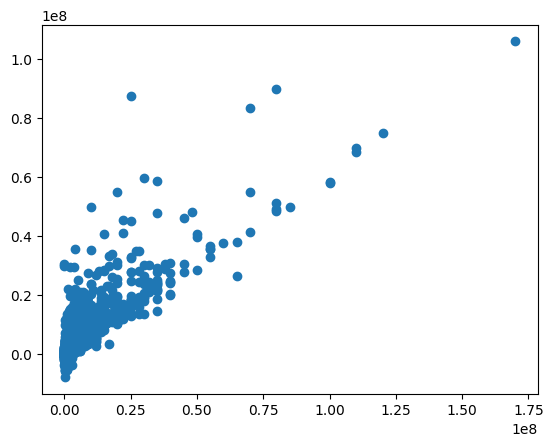

In [ ]:
plt.scatter(Real_Values,y_pred); 

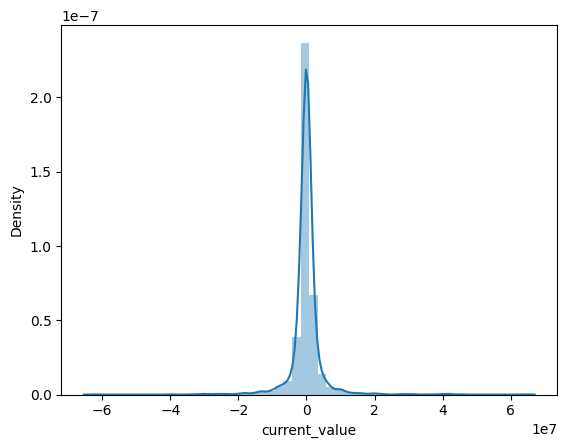

In [ ]:
sns.distplot((y_test-y_pred),bins=50); # it's good if we get normal distribution

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Set up parameter grids for Ridge and Lasso
param_grid_ridge = {
    'alpha': [0, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

param_grid_lasso = {
    'alpha': [0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}


In [94]:
# Implement GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Implement GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Best Ridge Model:", best_ridge)
print("Ridge Mean Squared Error:", mse_ridge)
print("Best Lasso Model:", best_lasso)
print("Lasso Mean Squared Error:", mse_lasso)


Best Ridge Model: Ridge()
Ridge Mean Squared Error: 12973238327166.338
Best Lasso Model: Lasso(alpha=0)
Lasso Mean Squared Error: 12992870188461.773
